In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from ast import literal_eval

from scipy.stats import bootstrap
import numpy as np

In [2]:
party_shifts_df = pd.read_csv(
    '../out_files/semantic_shifts_party_embeddings_per_period_merged_compass_50iterations.csv',
    converters={'period_pair': literal_eval})
party_shifts_df

,iteration,period_pair,word,semantic_similarity,common_voc_size,neighbors_t1,neighbors_t2
0,0,"(12, 13)",@συνασπισμος,0.852301,80563,"[('@συριζα', 0.7692288160324097), ('αριστερας'...","[('αριστερας', 0.747949481010437), ('ριζοσπαστ..."
1,0,"(15, 17)",@δημαρ,0.500367,88563,"[('@sw@δημαρ', 0.626854419708252), ('@κκε', 0....","[('δημαρ', 0.9519767165184021), ('οδυσσεα', 0...."
2,0,"(15, 17)",@κκε,0.926764,88563,"[('@δημαρ', 0.6201146841049194), ('@χα', 0.529...","[('@χα', 0.5424186587333679), ('@ποταμι', 0.51..."
3,0,"(12, 13)",@sw΄οψιν,0.789870,80563,"[('@sw’οψιν', 0.9064780473709106), ('οψιν', 0....","[('@sw’οψιν', 0.8102238774299622), ('οψιν', 0...."
4,0,"(11, 12)",μ΄@sw,0.505457,80924,"[('ανατολιτικο', 0.6135776042938232), ('κτιζαμ...","[('τελεσιδικο', 0.6178101897239685), ('ξοφλησα..."
...,...,...,...,...,...,...,...
13745,49,"(15, 17)",@συριζα,0.881856,88563,"[('@νδ', 0.5719690322875977), ('αντιπολιτευσης...","[('@νδ', 0.5631855726242065), ('@πασοκ', 0.459..."
13746,49,"(13, 15)",@νδ,0.885973,83188,"[('@πασοκ', 0.5925945043563843), ('αντιπολιτευ...","[('@sw@δημαρ', 0.6397783756256104), ('@πασοκ',..."
13747,49,"(11, 12)",β΄@sw,0.888412,80924,"[('οζαλ', 0.9397397041320801), ('6366', 0.9396...","[('καταπολεμησεως', 0.9366881847381592), ('σπε..."
13748,49,"(17, 18)",‘@sw,0.327772,75644,"[('΄89', 0.4891178011894226), ('παρελθουν', 0....","[('εξωσυμβατικα', 0.6369427442550659), ('ξεπαγ..."


In [3]:
def confidence_intervals(data):
    res = bootstrap((data,), np.mean, confidence_level=0.95)
    return (res.confidence_interval.low, res.confidence_interval.high)

In [4]:
average_similarity_df = party_shifts_df[['period_pair', 'word', 'semantic_similarity']].\
    groupby(['period_pair', 'word']).agg(['mean', confidence_intervals]).reset_index()
average_similarity_df.sort_values(by='period_pair', inplace=True)
average_similarity_df

period_pair             word semantic_similarity  \
                                                mean   
0        (7, 8)              @sw            0.980648   
1        (7, 8)  @sw@συνασπισμος            0.683303   
2        (7, 8)             @sw’            0.954732   
3        (7, 8)           @δηανα            0.237322   
4        (7, 8)             @κκε            0.851225   
..          ...              ...                 ...   
250    (17, 18)             @sw”            0.549018   
251    (17, 18)            @ανελ            0.638831   
252    (17, 18)           @δημαρ            0.259264   
254    (17, 18)        @ελληνικη            0.688132   
274    (17, 18)            “@sw”            0.504148   

                                                 
                           confidence_intervals  
0      (0.9801643450557698, 0.9811034992078375)  
1        (0.66486497929575, 0.7001235472177587)  
2      (0.9539027289650012, 0.9556634183959248)  
3    (0.22706778005008543, 0.24731865728888722)  
4       (0.849267334491353, 0.8533227406344805)  
..                                          ...  
250    (0.5363733398844701, 0.5614733276517956)  
251    (0.6354655268218954, 0.6419413818802566)  
252      (0.2512406082220349, 0.26687064427084)  
254      (0.6847483711078063, 0.69128208849775)  
274    (0.4888113135716119, 0.5185052188114698)  

[275 rows x 4 columns]

In [5]:
average_similarity_df[['ci_low', 'ci_high']] = pd.DataFrame(average_similarity_df[('semantic_similarity', 'confidence_intervals')].tolist(), 
                                                            index= average_similarity_df.index)
average_similarity_df

period_pair             word semantic_similarity  \
                                                mean   
0        (7, 8)              @sw            0.980648   
1        (7, 8)  @sw@συνασπισμος            0.683303   
2        (7, 8)             @sw’            0.954732   
3        (7, 8)           @δηανα            0.237322   
4        (7, 8)             @κκε            0.851225   
..          ...              ...                 ...   
250    (17, 18)             @sw”            0.549018   
251    (17, 18)            @ανελ            0.638831   
252    (17, 18)           @δημαρ            0.259264   
254    (17, 18)        @ελληνικη            0.688132   
274    (17, 18)            “@sw”            0.504148   

                                                   ci_low   ci_high  
                           confidence_intervals                      
0      (0.9801643450557698, 0.9811034992078375)  0.980164  0.981103  
1        (0.66486497929575, 0.7001235472177587)  0.664865  0.700124  
2      (0.9539027289650012, 0.9556634183959248)  0.953903  0.955663  
3    (0.22706778005008543, 0.24731865728888722)  0.227068  0.247319  
4       (0.849267334491353, 0.8533227406344805)  0.849267  0.853323  
..                                          ...       ...       ...  
250    (0.5363733398844701, 0.5614733276517956)  0.536373  0.561473  
251    (0.6354655268218954, 0.6419413818802566)  0.635466  0.641941  
252      (0.2512406082220349, 0.26687064427084)  0.251241  0.266871  
254      (0.6847483711078063, 0.69128208849775)  0.684748  0.691282  
274    (0.4888113135716119, 0.5185052188114698)  0.488811  0.518505  

[275 rows x 6 columns]

In [6]:
average_similarity_df['yerr_low'] = (average_similarity_df[('semantic_similarity', 'mean')] 
                                     - average_similarity_df['ci_low'])
average_similarity_df['yerr_high'] = (average_similarity_df['ci_high'] 
                                      - average_similarity_df[('semantic_similarity', 'mean')])
average_similarity_df

period_pair             word semantic_similarity  \
                                                mean   
0        (7, 8)              @sw            0.980648   
1        (7, 8)  @sw@συνασπισμος            0.683303   
2        (7, 8)             @sw’            0.954732   
3        (7, 8)           @δηανα            0.237322   
4        (7, 8)             @κκε            0.851225   
..          ...              ...                 ...   
250    (17, 18)             @sw”            0.549018   
251    (17, 18)            @ανελ            0.638831   
252    (17, 18)           @δημαρ            0.259264   
254    (17, 18)        @ελληνικη            0.688132   
274    (17, 18)            “@sw”            0.504148   

                                                   ci_low   ci_high  yerr_low  \
                           confidence_intervals                                 
0      (0.9801643450557698, 0.9811034992078375)  0.980164  0.981103  0.000483   
1        (0.66486497929575, 0.7001235472177587)  0.664865  0.700124  0.018438   
2      (0.9539027289650012, 0.9556634183959248)  0.953903  0.955663  0.000829   
3    (0.22706778005008543, 0.24731865728888722)  0.227068  0.247319  0.010255   
4       (0.849267334491353, 0.8533227406344805)  0.849267  0.853323  0.001958   
..                                          ...       ...       ...       ...   
250    (0.5363733398844701, 0.5614733276517956)  0.536373  0.561473  0.012645   
251    (0.6354655268218954, 0.6419413818802566)  0.635466  0.641941  0.003366   
252      (0.2512406082220349, 0.26687064427084)  0.251241  0.266871  0.008023   
254      (0.6847483711078063, 0.69128208849775)  0.684748  0.691282  0.003383   
274    (0.4888113135716119, 0.5185052188114698)  0.488811  0.518505  0.015337   

    yerr_high  
               
0    0.000456  
1    0.016820  
2    0.000931  
3    0.009996  
4    0.002097  
..        ...  
250  0.012455  
251  0.003110  
252  0.007607  
254  0.003150  
274  0.014357  

[275 rows x 8 columns]

In [7]:
periods = {
    7: (1989, 1993),
    8: (1993, 1996),
    9: (1996, 2000),
    10: (2000, 2004),
    11: (2004, 2007),
    12: (2007, 2009),
    13: (2009, 2012),
    14: (2012, 2012),
    15: (2012, 2014),
    16: (2015, 2015),
    17: (2015, 2019),
    18: (2019, 2020)
}

In [8]:
average_similarity_df['period_start'] = average_similarity_df['period_pair'].map(lambda x: periods[x[0]][0])
average_similarity_df['period_end'] = average_similarity_df['period_pair'].map(lambda x: periods[x[1]][1])
average_similarity_df

period_pair             word semantic_similarity  \
                                                mean   
0        (7, 8)              @sw            0.980648   
1        (7, 8)  @sw@συνασπισμος            0.683303   
2        (7, 8)             @sw’            0.954732   
3        (7, 8)           @δηανα            0.237322   
4        (7, 8)             @κκε            0.851225   
..          ...              ...                 ...   
250    (17, 18)             @sw”            0.549018   
251    (17, 18)            @ανελ            0.638831   
252    (17, 18)           @δημαρ            0.259264   
254    (17, 18)        @ελληνικη            0.688132   
274    (17, 18)            “@sw”            0.504148   

                                                   ci_low   ci_high  yerr_low  \
                           confidence_intervals                                 
0      (0.9801643450557698, 0.9811034992078375)  0.980164  0.981103  0.000483   
1        (0.66486497929575, 0.7001235472177587)  0.664865  0.700124  0.018438   
2      (0.9539027289650012, 0.9556634183959248)  0.953903  0.955663  0.000829   
3    (0.22706778005008543, 0.24731865728888722)  0.227068  0.247319  0.010255   
4       (0.849267334491353, 0.8533227406344805)  0.849267  0.853323  0.001958   
..                                          ...       ...       ...       ...   
250    (0.5363733398844701, 0.5614733276517956)  0.536373  0.561473  0.012645   
251    (0.6354655268218954, 0.6419413818802566)  0.635466  0.641941  0.003366   
252      (0.2512406082220349, 0.26687064427084)  0.251241  0.266871  0.008023   
254      (0.6847483711078063, 0.69128208849775)  0.684748  0.691282  0.003383   
274    (0.4888113135716119, 0.5185052188114698)  0.488811  0.518505  0.015337   

    yerr_high period_start period_end  
                                       
0    0.000456         1989       1996  
1    0.016820         1989       1996  
2    0.000931         1989       1996  
3    0.009996         1989       1996  
4    0.002097         1989       1996  
..        ...          ...        ...  
250  0.012455         2015       2020  
251  0.003110         2015       2020  
252  0.007607         2015       2020  
254  0.003150         2015       2020  
274  0.014357         2015       2020  

[275 rows x 10 columns]

In [9]:
average_similarity_df['period_middle'] = ((average_similarity_df['period_start'] 
                                           + average_similarity_df['period_end']) / 2)
average_similarity_df

period_pair             word semantic_similarity  \
                                                mean   
0        (7, 8)              @sw            0.980648   
1        (7, 8)  @sw@συνασπισμος            0.683303   
2        (7, 8)             @sw’            0.954732   
3        (7, 8)           @δηανα            0.237322   
4        (7, 8)             @κκε            0.851225   
..          ...              ...                 ...   
250    (17, 18)             @sw”            0.549018   
251    (17, 18)            @ανελ            0.638831   
252    (17, 18)           @δημαρ            0.259264   
254    (17, 18)        @ελληνικη            0.688132   
274    (17, 18)            “@sw”            0.504148   

                                                   ci_low   ci_high  yerr_low  \
                           confidence_intervals                                 
0      (0.9801643450557698, 0.9811034992078375)  0.980164  0.981103  0.000483   
1        (0.66486497929575, 0.7001235472177587)  0.664865  0.700124  0.018438   
2      (0.9539027289650012, 0.9556634183959248)  0.953903  0.955663  0.000829   
3    (0.22706778005008543, 0.24731865728888722)  0.227068  0.247319  0.010255   
4       (0.849267334491353, 0.8533227406344805)  0.849267  0.853323  0.001958   
..                                          ...       ...       ...       ...   
250    (0.5363733398844701, 0.5614733276517956)  0.536373  0.561473  0.012645   
251    (0.6354655268218954, 0.6419413818802566)  0.635466  0.641941  0.003366   
252      (0.2512406082220349, 0.26687064427084)  0.251241  0.266871  0.008023   
254      (0.6847483711078063, 0.69128208849775)  0.684748  0.691282  0.003383   
274    (0.4888113135716119, 0.5185052188114698)  0.488811  0.518505  0.015337   

    yerr_high period_start period_end period_middle  
                                                     
0    0.000456         1989       1996        1992.5  
1    0.016820         1989       1996        1992.5  
2    0.000931         1989       1996        1992.5  
3    0.009996         1989       1996        1992.5  
4    0.002097         1989       1996        1992.5  
..        ...          ...        ...           ...  
250  0.012455         2015       2020        2017.5  
251  0.003110         2015       2020        2017.5  
252  0.007607         2015       2020        2017.5  
254  0.003150         2015       2020        2017.5  
274  0.014357         2015       2020        2017.5  

[275 rows x 11 columns]

In [10]:
period_combos = {
    7: (5, 6, 7),
    8: (8,),
    9: (9,),
    10: (10,),
    11: (11,),
    12: (12,),
    13: (13,),
    14: (14, 15),
    15: (14, 15),
    16: (16, 17),
    17: (16, 17),
    18: (18,)
}

In [11]:
def period_ticklabel(period_pair):
    start, end = period_pair
    start_str = '-'.join([str(x) for x in period_combos[start]])
    end_str = '-'.join([str(x) for x in period_combos[end]])
    return f'{start_str} ({periods[start][0]}-{periods[start][1]}) &\n {end_str} ({periods[end][0]}-{periods[end][1]})'

period_ticklabel((7, 8))

'5-6-7 (1989-1993) &\n 8 (1993-1996)'

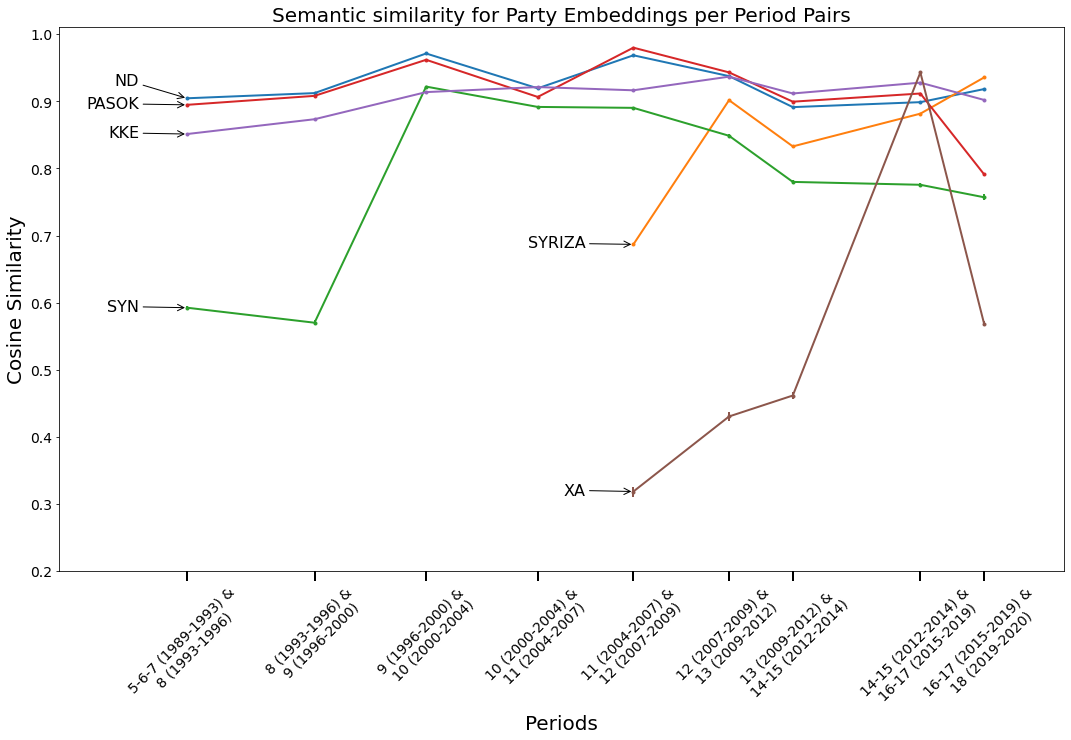

In [17]:
fig = plt.figure(figsize=(18, 10))

parties = {
    '@νδ': 'ND',
    '@συριζα': 'SYRIZA',
    '@συνασπισμος' : 'SYN',
    '@πασοκ': 'PASOK',
    '@κκε': 'KKE',
    '@χα': 'XA'
}

xytext_offsets = {
    '@νδ': (-1.5, 0.02),
    '@συριζα': (-1.5, -0.005),
    '@συνασπισμος' : (-1.5, -0.005),
    '@πασοκ': (-1.5, -0.005),
    '@κκε': (-1.5, -0.005),
    '@χα': (-1.5, -0.005)
}

for party in parties.keys():
    party_data_df = average_similarity_df[average_similarity_df['word'] == party]
    yerr = [
        party_data_df['yerr_low'],
        party_data_df['yerr_high']
    ]
    
    average_similarity = party_data_df[('semantic_similarity', 'mean')]
    x = party_data_df['period_middle'].iloc[0]
    y = average_similarity.iloc[0]
    plt.errorbar(x=party_data_df['period_middle'], 
                 y=average_similarity, 
                 yerr=yerr, 
                 label=party, 
                 linewidth=2, markersize=3, fmt='-o')
    plt.annotate(parties[party], 
                 xy=(x, y), 
                 xytext=(x+xytext_offsets[party][0], y+xytext_offsets[party][1]),
                 fontsize=16,
                 ha='right',
                 arrowprops=dict(arrowstyle='->'))

plt.xlim((1988.5, 2020))
plt.ylim((0.2, 1.01))

xticks = average_similarity_df['period_middle'].unique()
xtick_labels = [ period_ticklabel(x) for x in sorted(average_similarity_df['period_pair'].unique()) ]
plt.tick_params(axis='x', direction='out', which='major', length=10, width=2)
plt.yticks(fontsize=14)

plt.ylabel('Cosine Similarity', fontsize=20)
plt.xlabel('Periods', fontsize=20)
_ = plt.title('Semantic similarity for Party Embeddings per Period Pairs', fontsize=20)
plt.savefig('../out_files/compass_party_embeddings_per_period_errorbars.png', dpi=300,  bbox_inches='tight')